In [21]:
import pandas as pd
import numpy as np
import os

In [5]:
df_cic_ids2018 = pd.read_csv('/thesis_projects/dataset/agg_csv/all_data.csv')

In [4]:
df_benign = pd.read_csv('/thesis_projects/dataset/agg_csv/all_benign.csv')
df_malicious = pd.read_csv('/thesis_projects/dataset/agg_csv/all_malicious.csv')

In [4]:
df_cic_ids2018.head(5)

,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49453.0,6.0,2018-02-15 08:23:27,162133.0,3.0,2.0,752.0,693.0,645.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,443.0,6.0,2018-02-15 08:23:27,746334.0,8.0,10.0,951.0,4474.0,389.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,0.0,0.0,2018-02-15 08:23:27,133061.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,137.0,17.0,2018-02-15 08:23:27,67561383.0,10.0,0.0,572.0,0.0,68.0,50.0,...,8.0,5249858.0,0.0,5249858.0,5249858.0,60782864.0,0.0,60782865.0,60782865.0,Benign
4,49453.0,6.0,2018-02-15 08:23:27,23.0,1.0,1.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [5]:
print("Columns")
df_cic_ids2018.columns

Columns


Index(['Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count

In [6]:
# drop Timestamp' variable
df_cic_ids2018 = df_cic_ids2018.drop('Timestamp', axis=1)

In [7]:
### Analysis of dataset

In [8]:
print(f"Number of rows: {df_cic_ids2018.shape[0]}")
print(f"Number of columns: {df_cic_ids2018.shape[1]}")

Number of rows: 1468847
Number of columns: 69


In [9]:
#Check the distribution of dataset

In [10]:
print('Class distribution:')
df_cic_ids2018['Label'].value_counts()

Class distribution:


Label
Benign                      1272279
DoS attacks-Hulk             145199
DoS attacks-GoldenEye         41406
DoS attacks-Slowloris          9908
DoS attacks-SlowHTTPTest         55
Name: count, dtype: int64

In [11]:
print('Class distribution (normalized):')
df_cic_ids2018['Label'].value_counts()/df_cic_ids2018.shape[0]*100

Class distribution (normalized):


Label
Benign                      86.617531
DoS attacks-Hulk             9.885237
DoS attacks-GoldenEye        2.818946
DoS attacks-Slowloris        0.674543
DoS attacks-SlowHTTPTest     0.003744
Name: count, dtype: float64

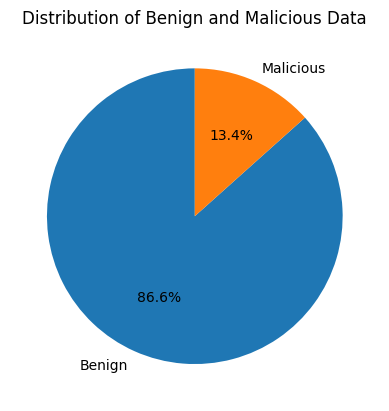

In [12]:
import matplotlib.pyplot as plt

benign_count = len(df_benign)
malicious_count = len(df_malicious)

# Create a list of counts
counts = [benign_count, malicious_count]

# Create labels for the pie chart
labels = ['Benign', 'Malicious']

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Set plot title
plt.title('Distribution of Benign and Malicious Data')

# Display the pie chart
plt.show()

In [13]:
#Check missing values

In [14]:
mssing_count = df_cic_ids2018.isnull().sum()
mssing_count = mssing_count[mssing_count > 0]
print(f"Rows contain null value: \n{mssing_count}\n")

mssing_count = mssing_count /mssing_count.shape[0] * 100
print(f"Rows contain null value (percentage): \n{mssing_count}\n")

Rows contain null value: 
Series([], dtype: int64)

Rows contain null value (percentage): 
Series([], dtype: float64)



In [15]:
#Check for infinity value

In [16]:
inf_count = np.isinf(df_cic_ids2018.iloc[:, 3:-1]).any(axis=1).sum()
print(f'Number of rows includes infinity value: {inf_count}; {inf_count/df_cic_ids2018.shape[0]*100:.2f}% of rows')

Number of rows includes infinity value: 0; 0.00% of rows


In [17]:
#Check for duplicates

In [18]:
#1.Check for duplicated column
df_cic_ids2018.columns[df_cic_ids2018.columns.value_counts() > 1]

Index([], dtype='object')

In [19]:
#2.Check for duplicate rows

df_cic_ids2018_duplicates = df_cic_ids2018[df_cic_ids2018.duplicated()]
print(f"number of duplicated rows: {df_cic_ids2018_duplicates.shape[0]}")
print(f"{df_cic_ids2018_duplicates.shape[0]/df_cic_ids2018.shape[0]*100:.2f}% of rows are duplicates")

number of duplicated rows: 0
0.00% of rows are duplicates


In [ ]:
#======================================================== Check point =========================================================================

In [7]:
##Relabel for Dos types
df_cic_ids2018.loc[df_cic_ids2018['Label'] != 'Benign', 'Label'] = 'malicious'
df_cic_ids2018.loc[df_cic_ids2018['Label'] == 'Benign', 'Label'] = 'benign'

df_cic_ids2018['Label'].value_counts()

Label
benign       1272279
malicious     196568
Name: count, dtype: int64

In [8]:
print(df_cic_ids2018.dtypes)

Destination Port          float64
Protocol                  float64
Flow Duration             float64
Total Fwd Packets         float64
Total Backward Packets    float64
                           ...   
Idle Mean                 float64
Idle Std                  float64
Idle Max                  float64
Idle Min                  float64
Label                      object
Length: 69, dtype: object


In [9]:
#change 'object' to 'catagorical' varible 
df_cic_ids2018['Label'] = df_cic_ids2018['Label'].astype('category')

In [10]:
print(df_cic_ids2018.dtypes)

Destination Port           float64
Protocol                   float64
Flow Duration              float64
Total Fwd Packets          float64
Total Backward Packets     float64
                            ...   
Idle Mean                  float64
Idle Std                   float64
Idle Max                   float64
Idle Min                   float64
Label                     category
Length: 69, dtype: object


In [11]:
##Encoding Target variable for Classification 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_cic_ids2018['Label'] = labelencoder.fit_transform(df_cic_ids2018['Label']) # 'benign'=0, 'malicious' = 1

In [16]:
#Svae dataset 
df_cic_ids2018.to_csv('encoded_ids2018.csv', index=False)

In [6]:
## Set X and Y 

In [12]:
ids2018_x = df_cic_ids2018.drop('Label', axis=1).copy()
ids2018_y = df_cic_ids2018['Label'].copy()

In [ ]:
#Svae dataset_X_Y

In [17]:
ids2018_x.to_csv('features_ids2018.csv', index=False)
ids2018_y.to_csv('target_ids2018.csv', index=False)

In [ ]:
## procedure
#1. Split dataset into Training and Test (preserves the same proportions of examples in each class as observed in the original dataset): Stratified Train-Test Splits
#2. Featureselection using only Training dataset: Randomforest/XGboost
#3. Stratified K-fold Cross valisation for Training Dataset: applying Undersampling at the same time. 
#4. Undersampling for Training dataset : Neighborhood Cleaning Rule

In [ ]:
"""
### Imbalanced dataset 절차

#1. Split dataset into Trianing and Test : Stratified Train-Test Splits
#2. Feature Selcetion : Feature Selcection은 Undersampling or Oversampling 전에 Training dataset만을 가지고 진행 
#2.K-folds cross validation for Training dataset(Don`t use the test dataset) : Cross Validation은 Training dataset을 가지고 한다!
주의사항: dersampling or Oversanpling을 먼저 진행해서는 안된다. 먼저 진행하게 되면 validation과 testdatset의 정보를 사용하는 것과 마찬가지 인다. 절대 validation set과 test set의 정보는 evaluation전에 사용되서는 안된다. 
1)각 폴더마다 Undersamplin or Oversampling을 진행
2)비교 모델들에 대해 각 K개의 training datasets으로 fitting 한후 k개의 validation set으로 평가한 후 
3)각 모델의 평균 accuracy 비교후 최종 모델 선택

#3.최종 모델을 가지고 Training dataset을 이용해 Re train 한다

#4. Test set을 가지고 Retrain된 최종 모델을 평가. 

참고 site:
https://machinelearningmastery.com/combine-oversampling-and-undersampling-for-imbalanced-classification/
https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html
https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation
"""